In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [10]:
train_data = train_gen.flow_from_directory(
    'FER2013/train',
    target_size = (48,48),
    color_mode = 'grayscale',
    class_mode = 'binary',
    batch_size = 16,
    shuffle=True
)

Found 300 images belonging to 2 classes.


In [11]:
test_data = test_gen.flow_from_directory(
    'FER2013/test',
    target_size = (48,48),
    color_mode = 'grayscale',
    class_mode = 'binary',
    batch_size = 16,
    shuffle=False
)

Found 200 images belonging to 2 classes.


In [12]:
model = Sequential()
model.add(Input(shape=(48,48,1)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(
    optimizer = Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

In [14]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = 50
)

Epoch 1/50


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.6105 - loss: 0.9050 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8628 - loss: 0.3468 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9181 - loss: 0.2236 - val_accuracy: 0.5550 - val_loss: 0.6892
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9660 - loss: 0.1474 - val_accuracy: 0.5400 - val_loss: 0.6891
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9508 - loss: 0.1210 - val_accuracy: 0.5000 - val_loss: 0.7236
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9836 - loss: 0.0710 - val_accuracy: 0.5000 - val_loss: 0.7004
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9946 - loss: 0.0407 - val_accuracy: 0.5000 - val_loss: 0.7001
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9919 - loss: 0.0365 - val_accuracy: 0.5000 - val_loss: 0

In [15]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f" Final Training Accuracy: {train_acc:.2f}")
print(f" Final Validation Accuracy: {val_acc:.2f}")


 Final Training Accuracy: 1.00
 Final Validation Accuracy: 0.80


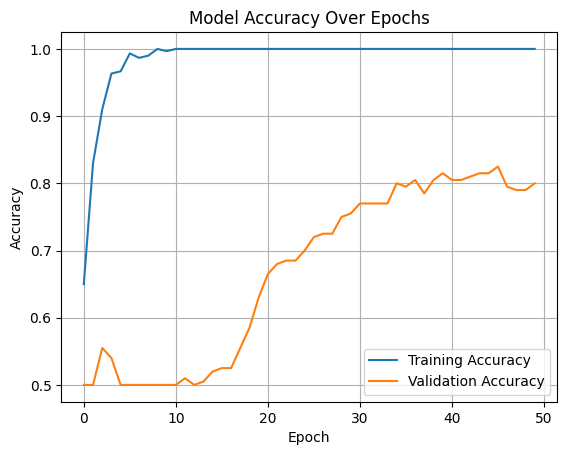

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report:

              precision    recall  f1-score   support

     Disgust       0.78      0.83      0.81       100
       Happy       0.82      0.77      0.79       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



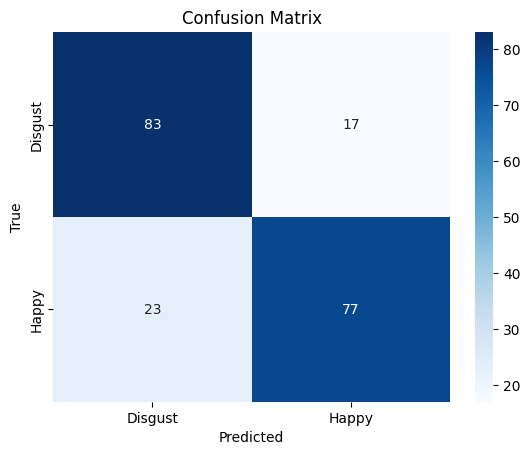

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict
y_pred = model.predict(test_data)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()  # sigmoid output → binary

# True labels
y_true = test_data.classes

# Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_labels, target_names=['Disgust', 'Happy']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Disgust', 'Happy'], yticklabels=['Disgust', 'Happy'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [58]:
model.save('emotion_model_bc.h5')
